# Lateral diffusion

## Imports

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Data

In [2]:
model = xr.open_dataset("../data/processed/model.nc")
model

<xarray.Dataset>
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    sst      (month, lat, lon) float32 ...
    sss      (month, lat, lon) float32 ...
    mld      (month, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [3]:
obs = xr.open_dataset("../data/processed/combined_observations.nc")
obs

<xarray.Dataset>
Dimensions:  (lat: 180, month: 12, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    sst      (month, lat, lon) float32 ...
    sss      (month, lat, lon) float32 ...
    mld      (month, lat, lon) float32 ...

In [4]:
eke = xr.open_dataset("dt_global_twosat_phy_l4_202307_vDT2021-M01.nc")
eke

<xarray.Dataset>
Dimensions:           (time: 1, nv: 2, latitude: 720, longitude: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2023-07-15
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
Data variables:
    crs               int32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    sla               (time, latitude, longitude) float64 ...
    eke               (time, latitude, longitude) float64 ...
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         Delayed Time Level-4 monthly means of Se...
    time_coverage_duration:          P1M
    time_coverage_end:               2023-07-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2023-07-01T00:00:00Z
    title:                           DT merged two-satellite Global Ocean L4 ...

In [5]:
target_lat = np.linspace(-89.5, 89.5, 180)
target_lon = np.linspace(0.5, 359.5, 360)

eke = eke.sel(
    latitude=target_lat, longitude=target_lon, method="nearest"
).assign_coords(
    latitude=target_lat, longitude=target_lon
).rename(
    {'latitude': 'lat', 'longitude': 'lon'}
)["eke"]
eke

<xarray.DataArray 'eke' (time: 1, lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-07-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    cell_methods:   time: mean within years
    grid_mapping:   crs
    long_name:      Averaged Eddy Kinetic Energy 2023/07
    standard_name:  specific_kinetic_energy_of_sea_water
    units:          cm2/s2

## Eddy errors

Results for EKE threshold: 1000


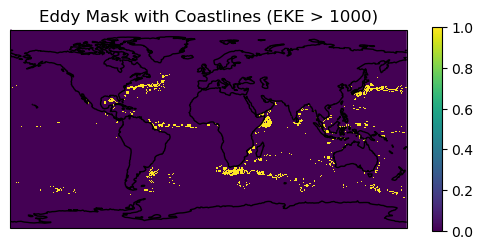

----------------------------------------
Configuration 00:
  SST  - RMSE in eddy regions:     1.222
  SST  - RMSE in non-eddy regions: 0.742
  SSS  - RMSE in eddy regions:     1.247
  SSS  - RMSE in non-eddy regions: 1.054
----------------------------------------
----------------------------------------
Configuration 08:
  SST  - RMSE in eddy regions:     1.275
  SST  - RMSE in non-eddy regions: 0.738
  SSS  - RMSE in eddy regions:     1.235
  SSS  - RMSE in non-eddy regions: 1.040
----------------------------------------
----------------------------------------
Configuration 09:
  SST  - RMSE in eddy regions:     1.310
  SST  - RMSE in non-eddy regions: 0.749
  SSS  - RMSE in eddy regions:     1.249
  SSS  - RMSE in non-eddy regions: 1.038
----------------------------------------
----------------------------------------
Configuration 10:
  SST  - RMSE in eddy regions:     1.284
  SST  - RMSE in non-eddy regions: 0.741
  SSS  - RMSE in eddy regions:     1.241
  SSS  - RMSE in non-eddy 

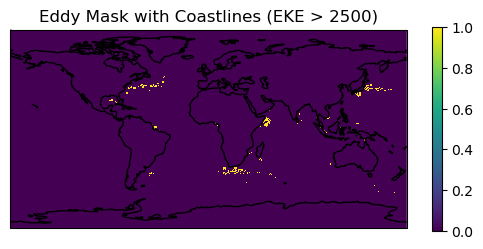

----------------------------------------
Configuration 00:
  SST  - RMSE in eddy regions:     1.457
  SST  - RMSE in non-eddy regions: 0.752
  SSS  - RMSE in eddy regions:     2.322
  SSS  - RMSE in non-eddy regions: 1.047
----------------------------------------
----------------------------------------
Configuration 08:
  SST  - RMSE in eddy regions:     1.538
  SST  - RMSE in non-eddy regions: 0.750
  SSS  - RMSE in eddy regions:     2.222
  SSS  - RMSE in non-eddy regions: 1.034
----------------------------------------
----------------------------------------
Configuration 09:
  SST  - RMSE in eddy regions:     1.587
  SST  - RMSE in non-eddy regions: 0.762
  SSS  - RMSE in eddy regions:     2.256
  SSS  - RMSE in non-eddy regions: 1.032
----------------------------------------
----------------------------------------
Configuration 10:
  SST  - RMSE in eddy regions:     1.544
  SST  - RMSE in non-eddy regions: 0.753
  SSS  - RMSE in eddy regions:     2.282
  SSS  - RMSE in non-eddy 

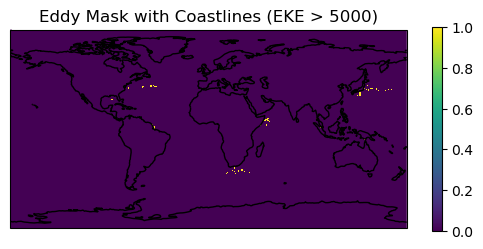

----------------------------------------
Configuration 00:
  SST  - RMSE in eddy regions:     1.366
  SST  - RMSE in non-eddy regions: 0.757
  SSS  - RMSE in eddy regions:     4.352
  SSS  - RMSE in non-eddy regions: 1.045
----------------------------------------
----------------------------------------
Configuration 08:
  SST  - RMSE in eddy regions:     1.449
  SST  - RMSE in non-eddy regions: 0.755
  SSS  - RMSE in eddy regions:     4.115
  SSS  - RMSE in non-eddy regions: 1.033
----------------------------------------
----------------------------------------
Configuration 09:
  SST  - RMSE in eddy regions:     1.476
  SST  - RMSE in non-eddy regions: 0.767
  SSS  - RMSE in eddy regions:     4.182
  SSS  - RMSE in non-eddy regions: 1.031
----------------------------------------
----------------------------------------
Configuration 10:
  SST  - RMSE in eddy regions:     1.425
  SST  - RMSE in non-eddy regions: 0.759
  SSS  - RMSE in eddy regions:     4.260
  SSS  - RMSE in non-eddy 

In [6]:
# List of EKE thresholds for defining "eddy" regions
eke_thresholds = [1000, 2500, 5000]

for eke_thr in eke_thresholds:
    print("="*60)
    print(f"Results for EKE threshold: {eke_thr}")
    print("="*60)
    
    # 1. Make eddy mask for this threshold
    eddy_mask = eke > eke_thr
    
    # 2. Plot mask (optional)
    proj = ccrs.PlateCarree()
    fig, ax = plt.subplots(subplot_kw={'projection': proj})
    im = eddy_mask.plot(ax=ax, transform=proj, cmap='viridis', add_colorbar=False)
    ax.coastlines()
    plt.colorbar(im, ax=ax, shrink=0.55)
    plt.title(f"Eddy Mask with Coastlines (EKE > {eke_thr})")
    plt.show()
    
    # 3. RMSE for SST and SSS for each configuration
    for cfg in ["00", "08", "09", "10", "12"]:
        ds = xr.open_dataset(f"../data/processed/nemo{cfg}.nc")

        results = {}
        for var in ["sst", "sss"]:
            error = ds[var] - obs[var]
            rmse_eddy = np.sqrt((error.where(eddy_mask)**2).mean())
            rmse_no_eddy = np.sqrt((error.where(~eddy_mask)**2).mean())
            results[var] = (rmse_eddy.values, rmse_no_eddy.values)

        print("-"*40)
        print(f"Configuration {cfg}:")
        print(f"  SST  - RMSE in eddy regions:     {results['sst'][0]:.3f}")
        print(f"  SST  - RMSE in non-eddy regions: {results['sst'][1]:.3f}")
        print(f"  SSS  - RMSE in eddy regions:     {results['sss'][0]:.3f}")
        print(f"  SSS  - RMSE in non-eddy regions: {results['sss'][1]:.3f}")
        print("-"*40)
        ds.close()
    print("\n")

Results for EKE threshold: 2500


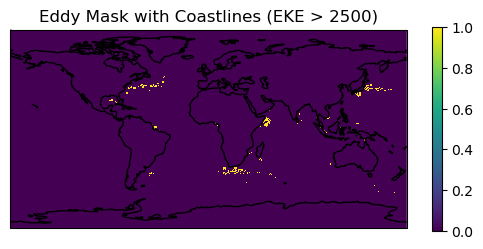

----------------------------------------
Ranking for SST (eddy regions, EKE > 2500):
1. Config 14: RMSE = 1.448
2. Config 04: RMSE = 1.452
3. Config 00: RMSE = 1.457
4. Config 05: RMSE = 1.460
5. Config 03: RMSE = 1.460
6. Config 07: RMSE = 1.512
7. Config 06: RMSE = 1.518
8. Config 12: RMSE = 1.529
9. Config 08: RMSE = 1.538
10. Config 10: RMSE = 1.544
11. Config 01: RMSE = 1.578
12. Config 09: RMSE = 1.587
13. Config 02: RMSE = 1.765
----------------------------------------
----------------------------------------
Ranking for SSS (eddy regions, EKE > 2500):
1. Config 08: RMSE = 2.222
2. Config 09: RMSE = 2.256
3. Config 02: RMSE = 2.266
4. Config 10: RMSE = 2.282
5. Config 06: RMSE = 2.288
6. Config 07: RMSE = 2.291
7. Config 12: RMSE = 2.294
8. Config 01: RMSE = 2.308
9. Config 00: RMSE = 2.322
10. Config 03: RMSE = 2.328
11. Config 14: RMSE = 2.364
12. Config 05: RMSE = 2.406
13. Config 04: RMSE = 2.408
----------------------------------------


In [8]:
# List of configurations to process
cfgs = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "12", "14"]

# Threshold for EKE to define "eddy" regions
eke_thr = 2500

print("="*60)
print(f"Results for EKE threshold: {eke_thr}")
print("="*60)

# 1. Make eddy mask for this threshold
eddy_mask = eke > eke_thr

# 2. (Optional) Plot mask
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': proj})
im = eddy_mask.plot(ax=ax, transform=proj, cmap='viridis', add_colorbar=False)
ax.coastlines()
plt.colorbar(im, ax=ax, shrink=0.55)
plt.title(f"Eddy Mask with Coastlines (EKE > {eke_thr})")
plt.show()

# 3. RMSE for SST and SSS for each configuration, store for ranking
rmse_results = { "sst": [], "sss": [] }

for cfg in cfgs:
    ds = xr.open_dataset(f"../data/processed/nemo{cfg}.nc")

    for var in ["sst", "sss"]:
        error = ds[var] - obs[var]
        rmse_eddy = np.sqrt((error.where(eddy_mask)**2).mean())
        rmse_results[var].append((cfg, float(rmse_eddy.values)))

    ds.close()

# 4. Order configurations by RMSE in eddy regions for each variable
for var in ["sst", "sss"]:
    print("-"*40)
    print(f"Ranking for {var.upper()} (eddy regions, EKE > {eke_thr}):")
    ranked = sorted(rmse_results[var], key=lambda x: x[1])
    for i, (cfg, rmse) in enumerate(ranked, 1):
        print(f"{i}. Config {cfg}: RMSE = {rmse:.3f}")
    print("-"*40)

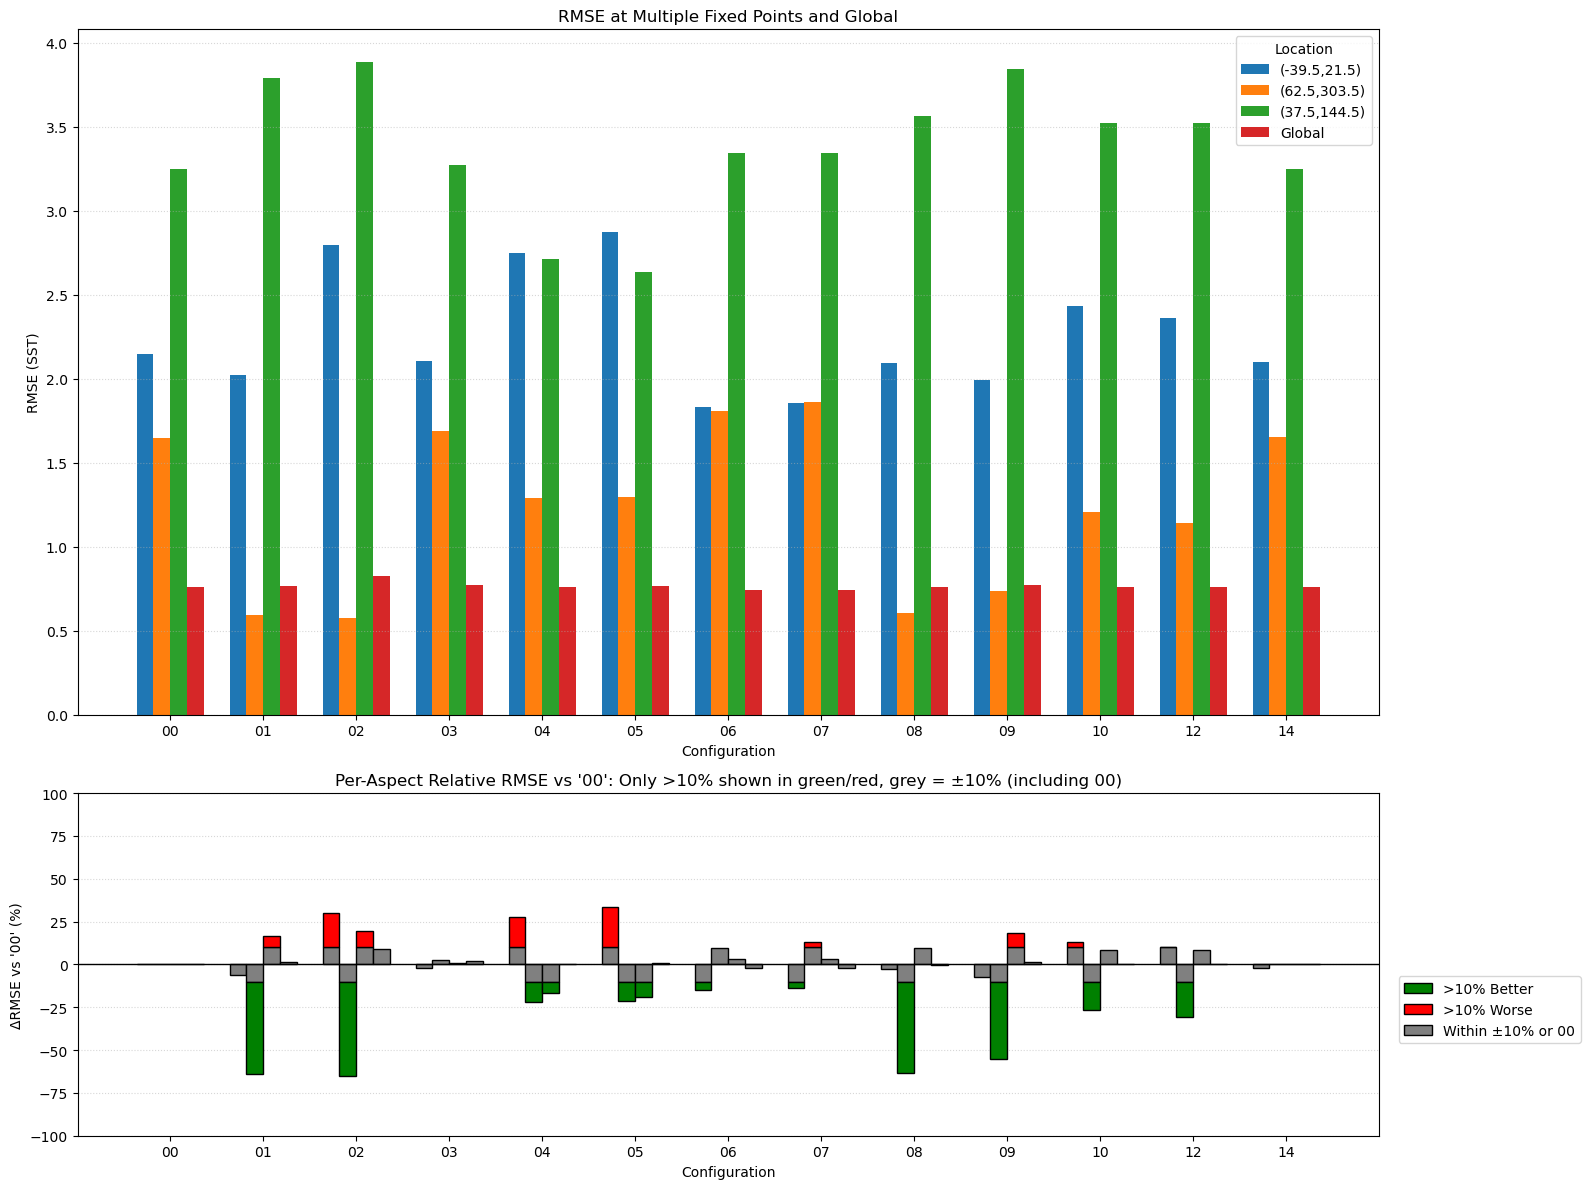

In [60]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# List of configurations and fixed points
cfgs = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "12", "14"]
fixed_points = [(-39.5, 21.5), (62.50, 303.50), (37.5, 144.5)]  # South Africa, Greenland, East Japan
point_labels = [f"({lat},{lon})" for lat, lon in fixed_points]
point_labels.append("Global")

rmse_results = {cfg: [] for cfg in cfgs}

for cfg in cfgs:
    ds = xr.open_dataset(f"../data/processed/nemo{cfg}.nc")
    rmse_points = []
    for lat, lon in fixed_points:
        LAT = [lat-2, lat-1, lat, lat+1, lat+2]
        LON = [lon-2, lon-1, lon, lon+1, lon+2]
        LAT, LON = np.meshgrid(LAT, LON)
        error = ds['sst'] - obs['sst']
        error = error.sel(lat=np.ravel(LAT), lon=np.ravel(LON))
        rmse = np.sqrt((error**2).mean())
        rmse_points.append(float(rmse.values))
    # Global RMSE
    error = ds['sst'] - obs['sst']
    rmse_global = np.sqrt((error**2).mean().values)
    rmse_points.append(float(rmse_global))
    rmse_results[cfg] = rmse_points
    ds.close()

# Convert to array for plotting and analysis
rmse_matrix = np.array([rmse_results[cfg] for cfg in cfgs])  # shape: (n_cfg, n_points+1)

n_cfg = len(cfgs)
n_aspects = len(point_labels)
x = np.arange(n_cfg)
bar_width = 0.18  # Use a good width for 4 bars per group

# --- Plot 1: RMSEs ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [2, 1]})
for i, label in enumerate(point_labels):
    offset = -((n_aspects-1)/2)*bar_width + i*bar_width
    ax1.bar(x + offset, rmse_matrix[:, i], bar_width, label=label)
ax1.set_xticks(x)
ax1.set_xticklabels(cfgs)
ax1.set_xlabel("Configuration")
ax1.set_ylabel("RMSE (SST)")
ax1.set_title("RMSE at Multiple Fixed Points and Global")
ax1.legend(title="Location")
ax1.grid(axis='y', linestyle=':', alpha=0.5)

# --- Plot 2: Relative RMSE difference (aligned & colored by size, including 00 as zeros) ---
idx_00 = cfgs.index("00")
rmse_00 = rmse_matrix[idx_00]
threshold = 10  # percent, significance level

# For symmetric y-axis, find max magnitude of all diffs (for nice axis scaling)
all_pcts = []
for i, label in enumerate(point_labels):
    for j, cfg in enumerate(cfgs):
        ref = rmse_00[i]
        val = rmse_matrix[j, i]
        if ref == 0:
            pct = 0.0
        else:
            pct = (val - ref) / ref * 100
        all_pcts.append(pct)
max_pct = max(abs(np.nanmin(all_pcts)), abs(np.nanmax(all_pcts)), 100)  # at least 100 for context

for i, label in enumerate(point_labels):
    offset = -((n_aspects-1)/2)*bar_width + i*bar_width
    for j, cfg in enumerate(cfgs):
        ref = rmse_00[i]
        val = rmse_matrix[j, i]
        if ref == 0:
            pct = 0.0
        else:
            pct = (val - ref) / ref * 100  # percent difference

        # For config "00", always draw zero-height grey bar
        if cfg == "00":
            ax2.bar(j + offset, 0, bar_width, color="grey", edgecolor='black', zorder=1)
        else:
            if abs(pct) <= threshold:
                ax2.bar(j + offset, pct, bar_width, color="grey", edgecolor='black', zorder=1)
            else:
                # Grey part for threshold, colored for excess
                ax2.bar(j + offset, np.sign(pct)*threshold, bar_width, color="grey", edgecolor='black', zorder=1)
                color = "green" if pct < -threshold else "red"
                ax2.bar(j + offset, pct - np.sign(pct)*threshold, bar_width, color=color, bottom=np.sign(pct)*threshold, edgecolor='black', zorder=2)

ax2.axhline(0, color='black', linewidth=1)
ax2.set_xticks(x)
ax2.set_xticklabels(cfgs)
ax2.set_xlabel("Configuration")
ax2.set_ylabel("ΔRMSE vs '00' (%)")
ax2.set_title("Per-Aspect Relative RMSE vs '00': Only >10% shown in green/red, grey = ±10% (including 00)")
ax2.set_ylim(-max_pct, max_pct)
ax2.grid(axis='y', linestyle=':', alpha=0.5)

# Build legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='>10% Better'),
    Patch(facecolor='red', edgecolor='black', label='>10% Worse'),
    Patch(facecolor='grey', edgecolor='black', label='Within ±10% or 00')
]
ax2.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1.01, 0.25))

plt.tight_layout()
plt.show()